数据库更新时间：2018-04-27


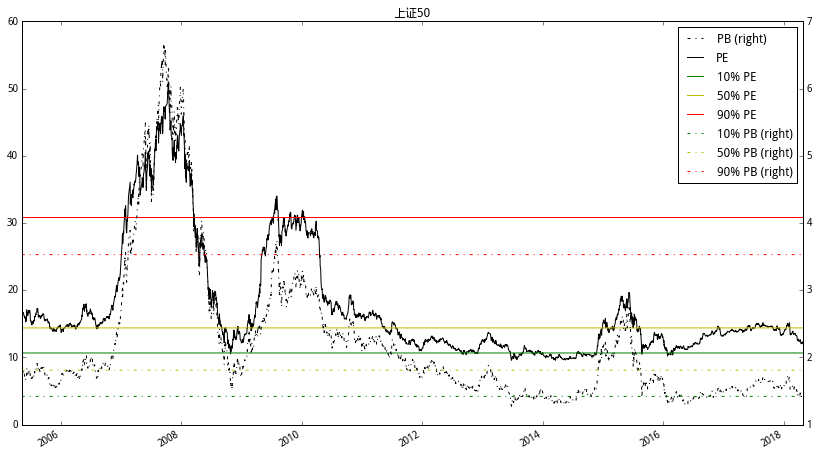

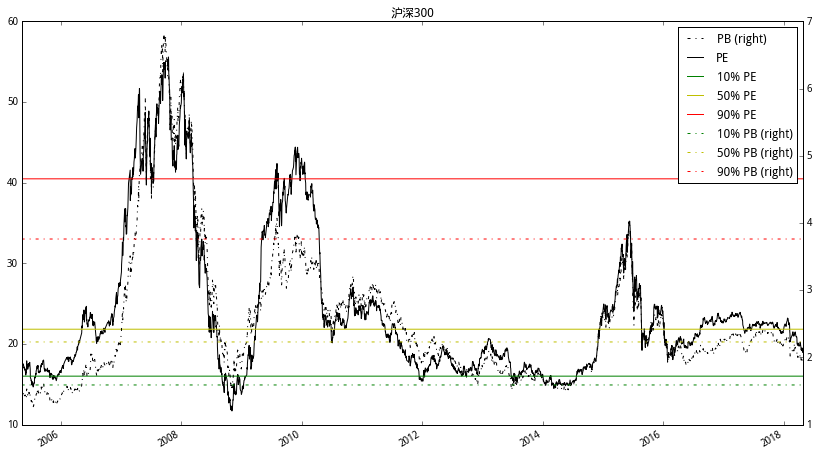

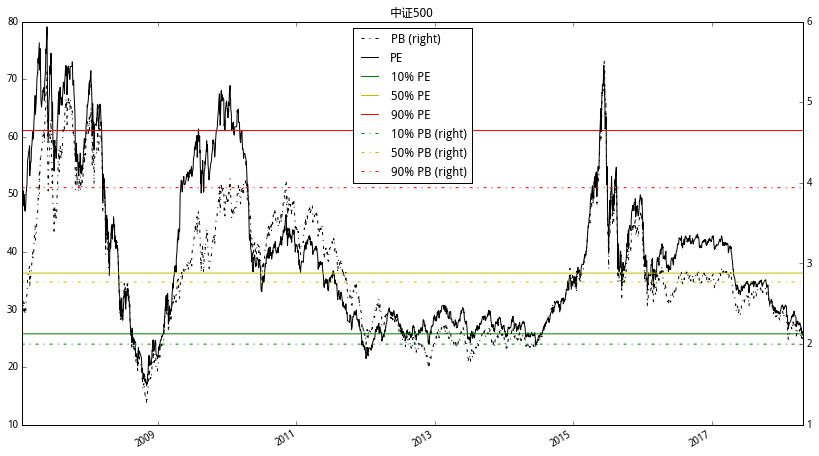

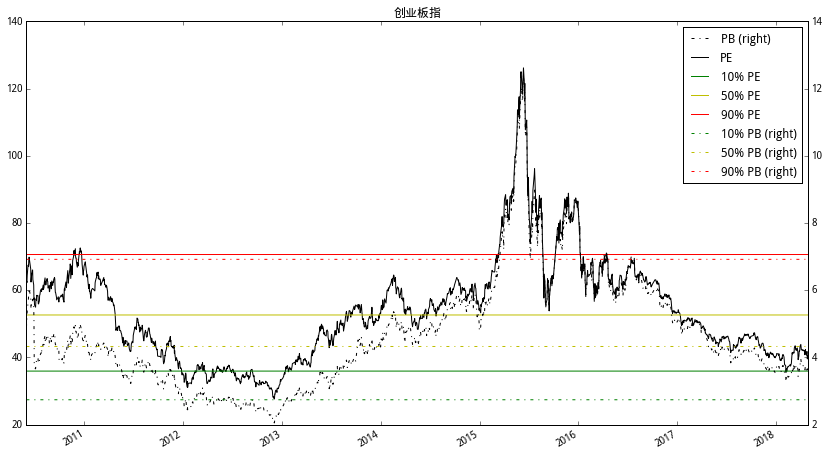

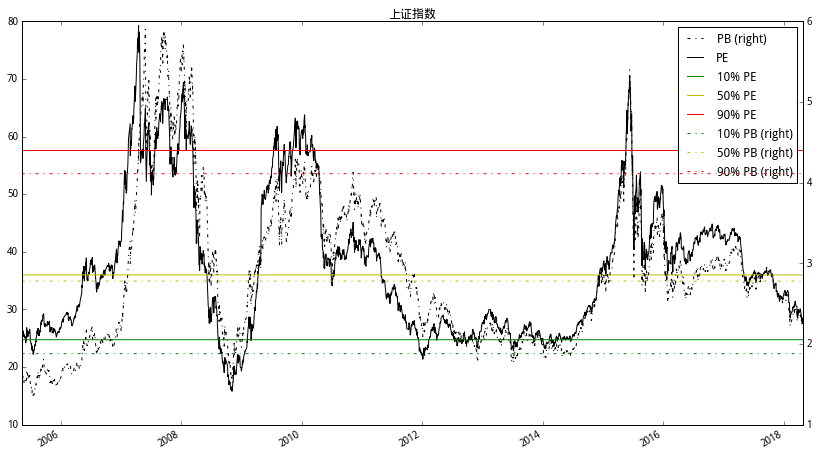

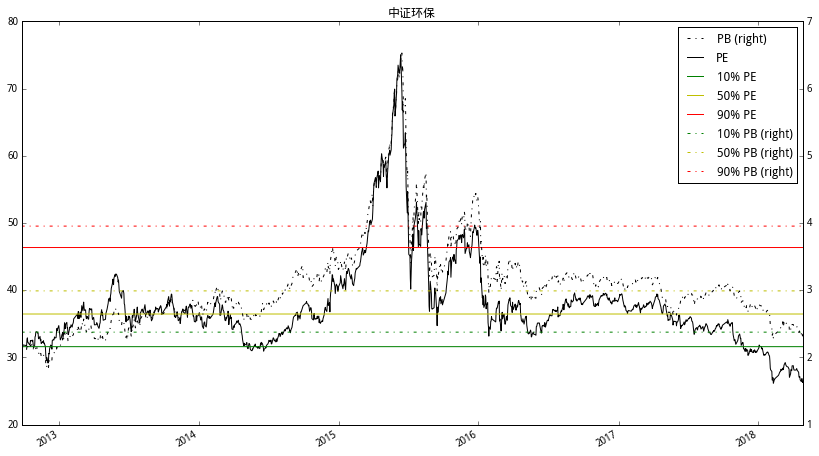

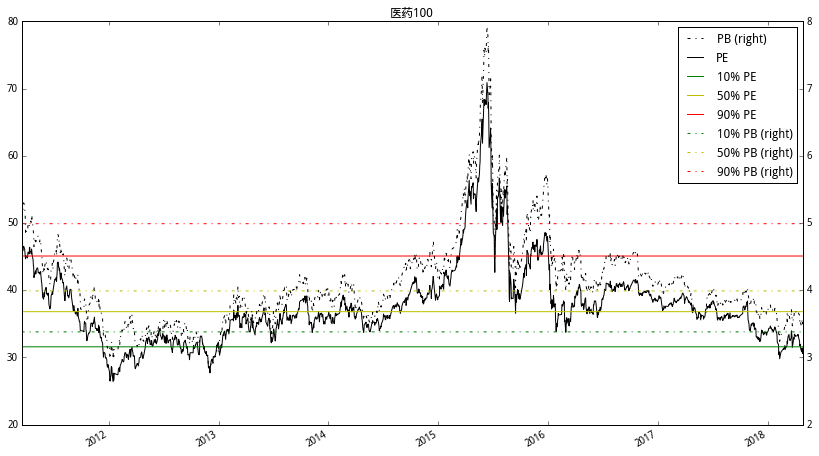

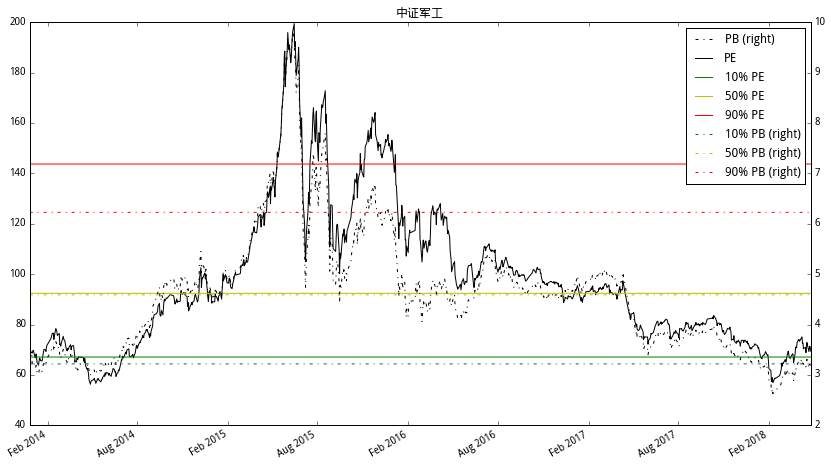

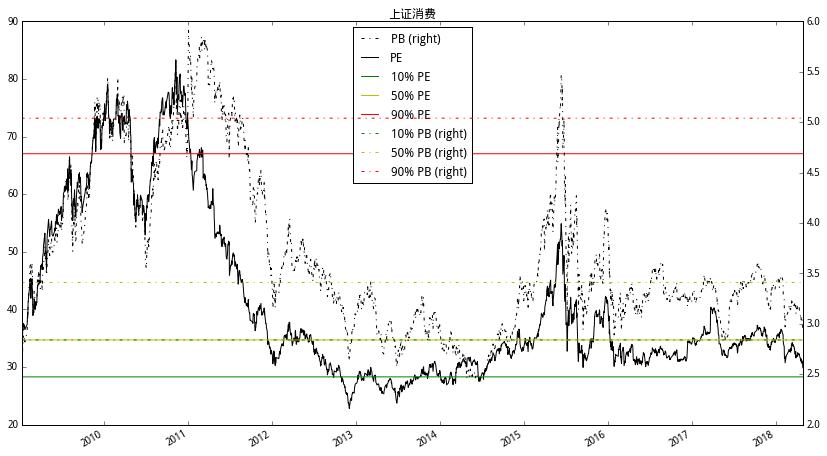

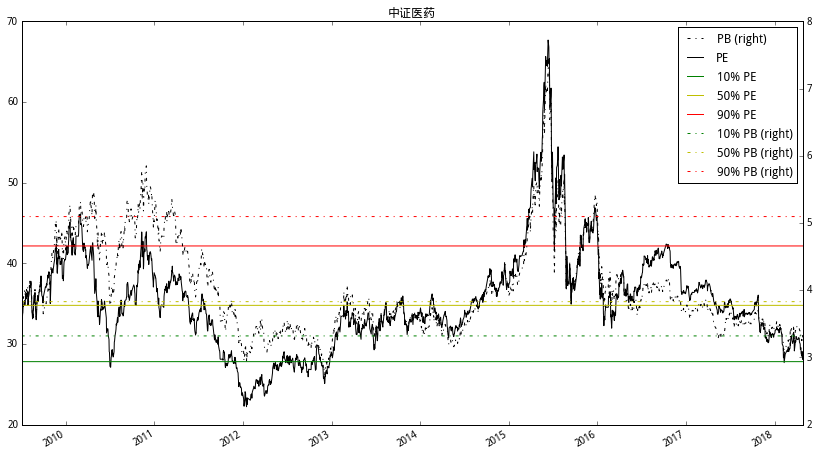

In [17]:
import pandas as pd
from df_pe_pb import * #导入本地模块df_pe_pb.py中的程序模块计算PE会比较快！
pd.options.mode.chained_assignment = None


def np_sum(index_symbol,date, pStatDate):
    stocks = get_index_stocks(index_symbol, date)
    q = query(income).filter(income.code.in_(stocks))
    #取一个季度的数据
    df = get_fundamentals(q, statDate=pStatDate)
    if len(df):
        npsum=sum(p for p in df.np_parent_company_owners)
        return npsum
    else:
        return float('NaN')
    
# 修正后让函数返回3个值：年同比增长yr，季度环比增长seah，季度同比增长seat。
def year_return(index_symbol,date):
    date = pd.to_datetime(date)
    curMonth=date.month
    if curMonth in [1,2,3]:
        #Q1
        #取得上年Q4,Q3,Q2,Q1
        curQ4=str(date.year-1)+"q4"
        curQ3=str(date.year-1)+"q3"
        curQ2=str(date.year-1)+"q2"
        curQ1=str(date.year-1)+"q1"
        curQ4Np=np_sum(index_symbol,date,curQ4)
        curQ3Np=np_sum(index_symbol,date,curQ3)
        curQ2Np=np_sum(index_symbol,date,curQ2)
        curQ1Np=np_sum(index_symbol,date,curQ1)

        curNp=curQ4Np+curQ3Np+curQ2Np+curQ1Np

        #取得上上年Q4,Q3,Q2,Q1
        lasQ4=str(date.year-2)+"q4"
        lasQ3=str(date.year-2)+"q3"
        lasQ2=str(date.year-2)+"q2"
        lasQ1=str(date.year-2)+"q1"
        lasQ4Np=np_sum(index_symbol,date,lasQ4)
        lasQ3Np=np_sum(index_symbol,date,lasQ3)
        lasQ2Np=np_sum(index_symbol,date,lasQ2)
        lasQ1Np=np_sum(index_symbol,date,lasQ1)

        lasNp=lasQ4Np+lasQ3Np+lasQ2Np+lasQ1Np
        
        yr=(curNp-lasNp)/lasNp
        sea_h=(curQ4Np-curQ3Np)/curQ3Np
        sea_t=(curQ4Np-lasQ4Np)/lasQ4Np

        return (yr,sea_h,sea_t)
    elif curMonth in [4,5,6]:
        #Q2
        #取得当年Q1,上年Q4,Q3,Q2
        curQ4=str(date.year)+"q1"
        curQ3=str(date.year-1)+"q4"
        curQ2=str(date.year-1)+"q3"
        curQ1=str(date.year-1)+"q2"        
        curQ4Np=np_sum(index_symbol,date,curQ4)
        curQ3Np=np_sum(index_symbol,date,curQ3)
        curQ2Np=np_sum(index_symbol,date,curQ2)
        curQ1Np=np_sum(index_symbol,date,curQ1)

        curNp=curQ4Np+curQ3Np+curQ2Np+curQ1Np

        #取得上年Q1,上上年Q4,Q3,Q2
        lasQ4=str(date.year-1)+"q1"
        lasQ3=str(date.year-2)+"q4"
        lasQ2=str(date.year-2)+"q3"
        lasQ1=str(date.year-2)+"q2"        

        lasQ4Np=np_sum(index_symbol,date,lasQ4)
        lasQ3Np=np_sum(index_symbol,date,lasQ3)
        lasQ2Np=np_sum(index_symbol,date,lasQ2)
        lasQ1Np=np_sum(index_symbol,date,lasQ1)

        lasNp=lasQ4Np+lasQ3Np+lasQ2Np+lasQ1Np

        yr=(curNp-lasNp)/lasNp
        sea_h=(curQ4Np-curQ3Np)/curQ3Np
        sea_t=(curQ4Np-lasQ4Np)/lasQ4Np

        return (yr,sea_h,sea_t)
    elif curMonth in [7,8,9]:
        #Q3
        #取得当年Q2,Q1,上年Q4,Q3
        curQ4=str(date.year)+"q2"
        curQ3=str(date.year)+"q1"
        curQ2=str(date.year-1)+"q4"
        curQ1=str(date.year-1)+"q3" 

        curQ4Np=np_sum(index_symbol,date,curQ4)
        curQ3Np=np_sum(index_symbol,date,curQ3)
        curQ2Np=np_sum(index_symbol,date,curQ2)
        curQ1Np=np_sum(index_symbol,date,curQ1)

        curNp=curQ4Np+curQ3Np+curQ2Np+curQ1Np


        #取得上年Q2,Q1,上上年Q4,Q3
        lasQ4=str(date.year-1)+"q2"
        lasQ3=str(date.year-1)+"q1"
        lasQ2=str(date.year-2)+"q4"
        lasQ1=str(date.year-2)+"q3"  

        lasQ4Np=np_sum(index_symbol,date,lasQ4)
        lasQ3Np=np_sum(index_symbol,date,lasQ3)
        lasQ2Np=np_sum(index_symbol,date,lasQ2)
        lasQ1Np=np_sum(index_symbol,date,lasQ1)

        lasNp=lasQ4Np+lasQ3Np+lasQ2Np+lasQ1Np
        
        yr=(curNp-lasNp)/lasNp
        sea_h=(curQ4Np-curQ3Np)/curQ3Np
        sea_t=(curQ4Np-lasQ4Np)/lasQ4Np

        return (yr,sea_h,sea_t)
    elif curMonth in [10,11,12]:
        #Q4
        #取得当年Q3,Q2,Q1,上年Q4
        curQ4=str(date.year)+"q3"
        curQ3=str(date.year)+"q2"
        curQ2=str(date.year)+"q1"
        curQ1=str(date.year-1)+"q4" 

        curQ4Np=np_sum(index_symbol,date,curQ4)
        curQ3Np=np_sum(index_symbol,date,curQ3)
        curQ2Np=np_sum(index_symbol,date,curQ2)
        curQ1Np=np_sum(index_symbol,date,curQ1)

        curNp=curQ4Np+curQ3Np+curQ2Np+curQ1Np

        #取得上年Q3,Q2,Q1,上上年Q4
        lasQ4=str(date.year-1)+"q3"
        lasQ3=str(date.year-1)+"q2"
        lasQ2=str(date.year-1)+"q1"
        lasQ1=str(date.year-2)+"q4"  

        lasQ4Np=np_sum(index_symbol,date,lasQ4)
        lasQ3Np=np_sum(index_symbol,date,lasQ3)
        lasQ2Np=np_sum(index_symbol,date,lasQ2)
        lasQ1Np=np_sum(index_symbol,date,lasQ1)

        lasNp=lasQ4Np+lasQ3Np+lasQ2Np+lasQ1Np

        yr=(curNp-lasNp)/lasNp
        sea_h=(curQ4Np-curQ3Np)/curQ3Np
        sea_t=(curQ4Np-lasQ4Np)/lasQ4Np

        return (yr,sea_h,sea_t)

def index_pe(index_symbol,date):
    stocks = get_index_stocks(index_symbol, date)
    q = query(valuation).filter(valuation.code.in_(stocks))
    df = get_fundamentals(q, date)
    if len(df)>0:
        pe = len(df)/sum([1/p if p>0 else 0 for p in df.pe_ratio])
        return pe
    else:
        return float('NaN')

    
index_symbols = [ '000016.XSHG','000300.XSHG','000905.XSHG','000852.XSHG','399006.XSHE',#宽指数
     '000001.XSHG','399001.XSHE','000902.XSHG','000985.XSHG',#大盘指数
     '000015.XSHG','000922.XSHG','000827.XSHG','000978.XSHG',#策略指数
    '000990.XSHG','000991.XSHG',#全指医药消费
     '399967.XSHE','399975.XSHE',#中证军工、证券
    '399106.XSHE','399316.XSHE','000036.XSHG','000037.XSHG','000038.XSHG','000039.XSHG','000158.XSHG','000933.XSHG']

allindexs = get_all_securities('index')
df_index = allindexs[allindexs.index.isin(index_symbols)]

date = pd.datetime.today()
# get_hs_data(index_symbols)#增量更新index中pe，pb的数据并导出csv

for symbol in index_symbols:
    index_name = allindexs.ix[symbol].display_name
    (yr,sea_h,sea_t)= year_return(symbol,date)
    data_root='./'
    data_path = '%s%s_pe_pb.csv'%(data_root,convert_code(symbol))
    df_pe_pb = pd.DataFrame.from_csv(data_path)
    df_pe_pb = df_pe_pb[df_pe_pb.iloc[-1].name.date() - timedelta(365*13):] #最长13年的数据
    pe_quantile=(len(df_pe_pb.PE[df_pe_pb.PE<df_pe_pb.iloc[-1].PE]))/float(len(df_pe_pb.PE))*100
    pb_quantile=len(df_pe_pb.PB[df_pe_pb.PB<df_pe_pb.iloc[-1].PB])/float(len(df_pe_pb.PB))*100
    q_pes = [df_pe_pb['PE'].quantile(i/10.0)  for i in range(11)]
    q_pbs = [df_pe_pb['PB'].quantile(i/10.0)  for i in range(11)] 
    
    pe=df_pe_pb.iloc[-1].PE  
    pb=df_pe_pb.iloc[-1].PB  
    
    df_pe_pb['10% PE']=q_pes[1]
    df_pe_pb['50% PE']=q_pes[5]
    df_pe_pb['90% PE']=q_pes[9]
    df_pe_pb['10% PB']=q_pbs[1]
    df_pe_pb['50% PB']=q_pbs[5]
    df_pe_pb['90% PB']=q_pbs[9]
    
#     pe = index_pe(symbol,date) #通过计算求pe
    df_index.loc[symbol,'year%'] = '{:.2%}'.format(yr)
    df_index.loc[symbol,'sea_h%']='{:.2%}'.format(sea_h)
    df_index.loc[symbol,'sea_t%']='{:.2%}'.format(sea_t)
    df_index.loc[symbol,'PE'] = '{:.2f}'.format(pe)
    df_index.loc[symbol,'PE分位']=pe_quantile
    df_index.loc[symbol,'PB'] = '{:.2f}'.format(pb)
    df_index.loc[symbol,'PB分位']=pb_quantile
    if yr<0:
        df_index.loc[symbol,'PEG_Y'] = float('inf')
    else:
        df_index.loc[symbol,'PEG_Y'] = pe/yr*0.01
    if sea_h<0:
        df_index.loc[symbol,'PEG_H'] = float('inf')
    else:
        df_index.loc[symbol,'PEG_H'] = pe/sea_h*0.01
    if sea_t<0:
        df_index.loc[symbol,'PEG_T'] = float('inf')
    else:
        df_index.loc[symbol,'PEG_T'] = pe/sea_t*0.01
    
    if symbol in ['000001.XSHG','000016.XSHG','000300.XSHG','000905.XSHG','399006.XSHE',\
            '000827.XSHG','000978.XSHG','399967.XSHE','000933.XSHG','000036.XSHG']:
        df_pe_pb.plot(secondary_y=['PB','10% PB','50% PB','90% PB'],\
                  figsize=(14,8),title=index_name,style=['k-.', 'k', 'g', 'y', 'r', 'g-.', 'y-.', 'r-.'])

print '数据库更新时间：'+str(df_pe_pb.iloc[-1].name.date())
    



In [15]:
print '数据库更新时间：'+str(df_pe_pb.iloc[-1].name.date())
df=df_index.sort('PE分位').iloc[:,[0,2,5,6,7,8,10,9,11,12,13,14]]
df['mix']=(df['PE分位'].values/(df['PE分位'].values.max()-df['PE分位'].values.min())+\
                df['PB分位'].values/(df['PB分位'].values.max()-df['PB分位'].values.min())+\
                df['PEG_Y'].values/(19.61-0.68))/3
df.sort('mix')

数据库更新时间：2018-04-27


,display_name,start_date,year%,sea_h%,sea_t%,PE,PB,PE分位,PB分位,PEG_Y,PEG_H,PEG_T,mix
000852.XSHG,中证1000指数,2014-10-17,36.80%,-4.00%,30.67%,32.53,2.45,0.00,0.70,0.88,inf,1.06,0.02
000827.XSHG,中证环保,2012-09-25,21.64%,-42.88%,11.16%,26.44,2.32,0.22,7.59,1.22,inf,2.37,0.09
000158.XSHG,上证环保,2012-09-25,25.51%,-39.27%,4.09%,23.43,2.31,0.00,9.65,0.92,inf,5.73,0.10
000037.XSHG,上证医药,2009-01-09,41.50%,27.21%,32.44%,28.12,3.23,8.18,7.78,0.68,1.03,0.87,0.12
000922.XSHG,中证红利,2008-05-26,8.56%,31.19%,8.37%,12.88,1.40,14.45,8.03,1.50,0.41,1.54,0.18
000933.XSHG,中证医药,2009-07-03,31.74%,23.76%,27.02%,28.53,3.32,13.52,9.88,0.90,1.20,1.06,0.18
000905.XSHG,中证500,2007-01-15,28.63%,-1.43%,18.56%,25.55,2.07,8.52,14.17,0.89,inf,1.38,0.18
000978.XSHG,医药100,2011-03-18,33.58%,25.36%,29.67%,30.99,3.55,7.80,17.27,0.92,1.22,1.04,0.21
000016.XSHG,上证50,2004-01-02,13.45%,35.24%,11.52%,12.06,1.41,24.41,8.04,0.90,0.34,1.05,0.22
000038.XSHG,上证金融,2009-01-09,10.61%,41.91%,8.39%,9.47,1.17,28.53,7.03,0.89,0.23,1.13,0.23


In [4]:
date = pd.datetime.today()
stocks = get_index_stocks('000015.XSHG', date)
q = query(income).filter(income.code.in_(['002091.XSHE']))
df=get_fundamentals(q,statDate='2018q1')
df['np_parent_company_owners']

0    2.28e+08
Name: np_parent_company_owners, dtype: float64

In [8]:
def hdsum(x,y):
    return (x+y,x*y)

(a,b)=hdsum(1,2)
print(a)

3


In [9]:
from df_pe_pb import *

# 理解代码深层次含义，会发现更简洁的计算方法！
code='000016.XSHG'
data_root='./'
# all_index = get_all_securities(['index'])
# pe_results = []
# pe_code_list = []
# pb_results = []
# pb_code_list = []
data_path = '%s%s_pe_pb.csv'%(data_root,convert_code(code))
# index_name = all_index.ix[code].display_name
df_pe_pb = pd.DataFrame.from_csv(data_path)
# df_pe_pb = df_pe_pb[df_pe_pb.iloc[-1].name.date() - timedelta(365*13):] #最长十年的数据

# pe_ratio = len(df_pe_pb.PE[df_pe_pb.PE<df_pe_pb.iloc[-1].PE])/float(len(df_pe_pb.PE))*100
# pb_ratio = len(df_pe_pb.PB[df_pe_pb.PB<df_pe_pb.iloc[-1].PB])/float(len(df_pe_pb.PB))*100        
# pe_results.append([convert_code(code),index_name, df_pe_pb.iloc[-1].PE, '%.2f'%pe_ratio, calc_state(pe_ratio),
#                            min(df_pe_pb.PE), max(df_pe_pb.PE), '%.2f'%median(df_pe_pb.PE), '%.2f'%std(df_pe_pb.PE),
#                            df_pe_pb.iloc[0].name.date()])
float(len(df_pe_pb.PE[df_pe_pb.PE<df_pe_pb.iloc[-1].PE]))/(len(df_pe_pb.PE))*100
df_pe_pb.iloc[-1].PE
df_pe_pb.iloc[-1].PE

12.06

'2018-04-27'